In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from torchvision.datasets import MNIST
from torch.utils.data import Subset, DataLoader, Dataset
from torchvision.transforms import v2
from improved_diffusion.unet import UNetModel
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from rectified_flow.utils import denormalize_image, count_parameters
from rectified_flow import RectifiedFlow, RectifiedFlowTrainer

In [3]:
dataset = MNIST(
    root="../data",
    download=True,
    train=True,
    transform=v2.Compose([
        v2.Resize((32, 32)),
        v2.ToTensor(),
    ])
)

/Users/ericchen/Eric/smol-rectified-flow/.venv/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


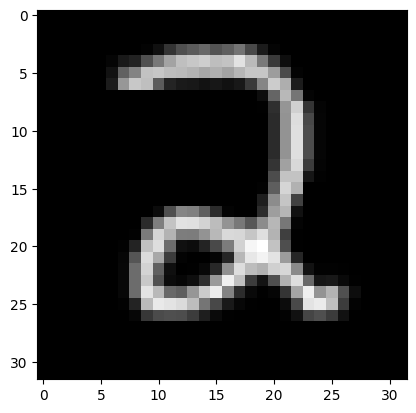

In [4]:
plt.imshow(dataset[432][0][0], cmap="gray")

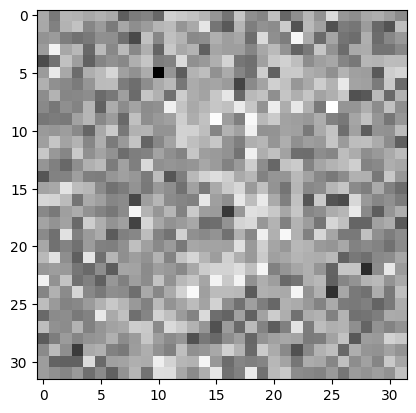

In [5]:
# add noise to image
idx = 0
x0 = dataset[idx][0]
t = torch.tensor([0.5])
xt = RectifiedFlow.add_noise(x0, t)

plt.imshow(xt[0], cmap="gray")

In [6]:
dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 5)

In [7]:
unet = UNetModel(
    in_channels=1,
    out_channels=1,
    model_channels=32,
    num_res_blocks=1,
    attention_resolutions=(8,),
    channel_mult=(1, 2, 2, 2),
    num_classes=10,
)
rectified_flow = RectifiedFlow(unet)

count_parameters(unet)

1525537

In [10]:
rectified_flow.get_config()

{'in_channels': 1,
 'model_channels': 32,
 'out_channels': 1,
 'num_res_blocks': 1,
 'attention_resolutions': (8,),
 'dropout': 0,
 'channel_mult': (1, 2, 2, 2),
 'conv_resample': True,
 'dims': None,
 'num_classes': 10,
 'use_checkpoint': False,
 'num_heads': 1,
 'num_heads_upsample': 1}

In [8]:

trainer = RectifiedFlowTrainer(
    rectified_flow=rectified_flow,
    dataset=dataset,
    device="mps"
)

In [9]:
trainer.train()

  1%|          | 309/50000 [00:35<1:34:13,  8.79it/s, loss=0.086] 


KeyboardInterrupt: 

In [14]:
samples = rectified_flow.sample(num_steps=50, shape=(1, 32, 32), cond=torch.tensor([2], device="mps"))

100%|██████████| 50/50 [00:00<00:00, 51.74it/s]


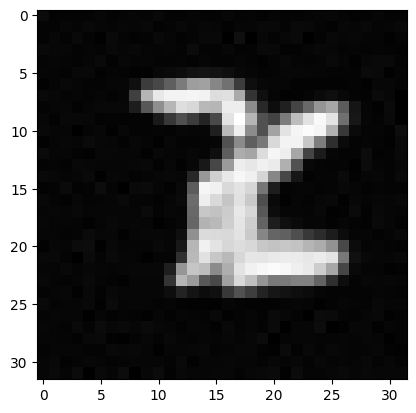

In [15]:
plt.imshow(samples[0][0].cpu(), cmap="gray")